In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()
import io
data_train=pd.read_csv(io.BytesIO(uploaded['Toddler Autism dataset July 2018.csv']))
data_train.head()

Saving Toddler Autism dataset July 2018.csv to Toddler Autism dataset July 2018.csv


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
data_train.shape

(1054, 19)

In [ ]:
# Removing character "F" present in data
data_train=data_train[data_train.Ethnicity!='F']
data_train=data_train[data_train.Family_mem_with_ASD!='F']
# data_train=data_train[data_train.Who completed the test!='F']
3#data_train=data_train[data_train.Class/ASD Traits!='F']
data_train.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
# Assigning each category a number for Category feature
sex={'f': 1,'m':0}
data_train["Sex"]=data_train["Sex"].map(sex)
data_train.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,1,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,0,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,0,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,0,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,1,White European,no,yes,family member,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


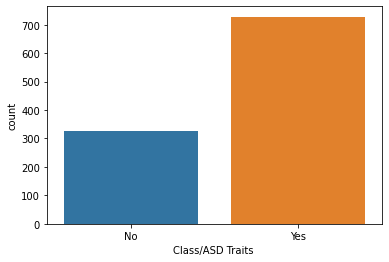

In [ ]:
import seaborn as sns
sns.countplot(data_train['Class/ASD Traits '])


In [ ]:
data_train.columns


Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
data_train.drop(['Case_No','Who completed the test'], axis=1, inplace=True)

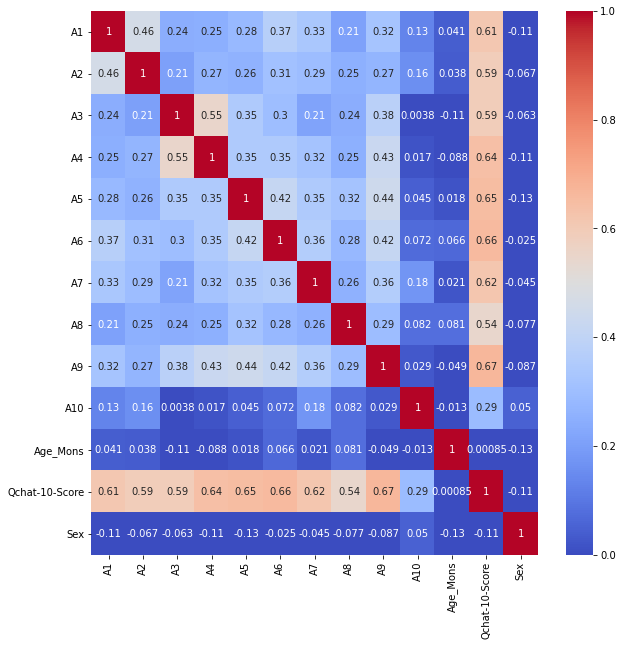

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data_train.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1)

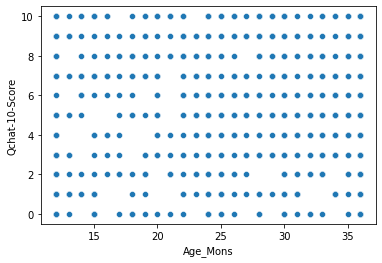

In [ ]:
sns.scatterplot(x='Age_Mons',y='Qchat-10-Score',data=data_train)


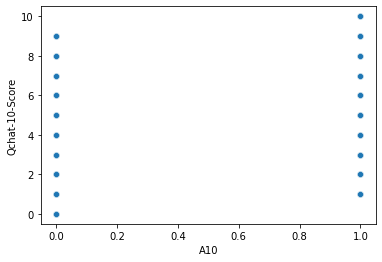

In [ ]:
sns.scatterplot(x='A10',y='Qchat-10-Score',data=data_train)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

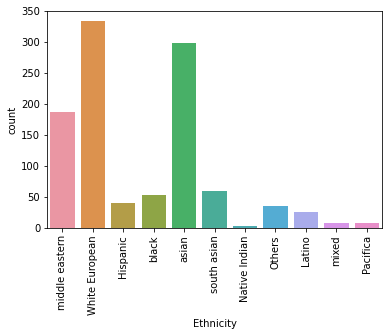

In [ ]:
sns.countplot(data_train['Ethnicity'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

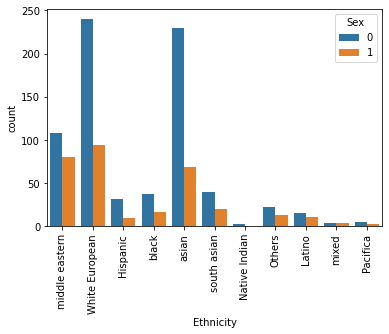

In [ ]:
sns.countplot(x='Ethnicity',hue='Sex',data=data_train)
plt.xticks(rotation=90)

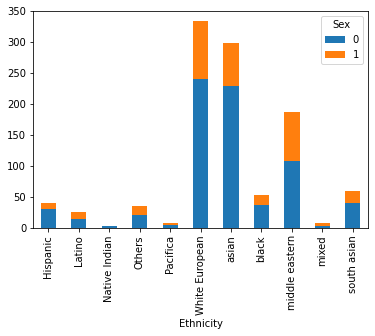

In [ ]:
data_train_plot = data_train.groupby(['Sex', 'Ethnicity']).size().reset_index().pivot(columns='Sex', index='Ethnicity', values=0)
# data_train_plot
data_train_plot.plot(kind='bar', stacked=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

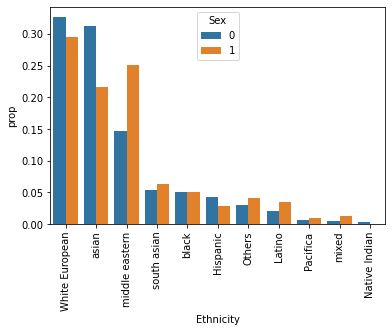

In [ ]:
x, y, hue = 'Ethnicity', 'prop', 'Sex'
prop_data_train = (data_train[x]
            .groupby(data_train[hue])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())
sns.barplot(x=x,y=y,hue=hue,data=prop_data_train)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


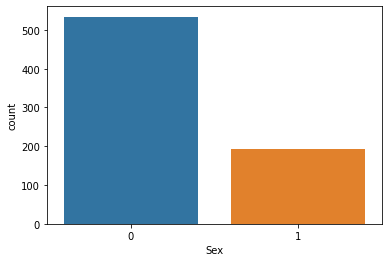

In [ ]:
# sns.countplot(data_train['Sex'])
data_train = data_train[data_train['Class/ASD Traits ']=='Yes']
sns.countplot(data_train['Sex'])
#we can see more males are are categorized as ASD thru the app

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 1 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   728 non-null    int64 
 1   A2                   728 non-null    int64 
 2   A3                   728 non-null    int64 
 3   A4                   728 non-null    int64 
 4   A5                   728 non-null    int64 
 5   A6                   728 non-null    int64 
 6   A7                   728 non-null    int64 
 7   A8                   728 non-null    int64 
 8   A9                   728 non-null    int64 
 9   A10                  728 non-null    int64 
 10  Age_Mons             728 non-null    int64 
 11  Qchat-10-Score       728 non-null    int64 
 12  Sex                  728 non-null    int64 
 13  Ethnicity            728 non-null    object
 14  Jaundice             728 non-null    object
 15  Family_mem_with_ASD  728 non-null    object
 16  Class/A

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_features = df.select_dtypes(include='object')
num_features = df.select_dtypes(exclude='object')
df = pd.get_dummies(df, drop_first=True)
df

In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


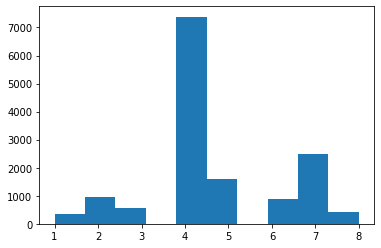

In [ ]:
plt.hist(data_train["category"])
plt.show()

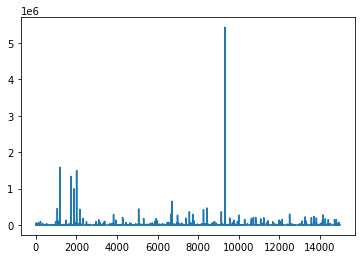

In [ ]:
plt.plot(data_train["adview"])
plt.show()

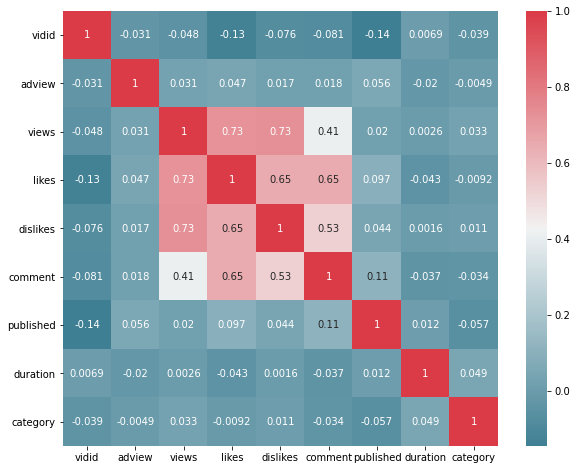

In [ ]:
data_train = data_train[data_train["adview"] <2000000]

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [ ]:
# Evaluation Metrics
from sklearn import metrics

def print_error(X_test, y_test, model_name):

  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


  # Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2759.4600409836066
Mean Squared Error: 894912708.1130464
Root Mean Squared Error: 29915.09164473755


In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split, min_samples_leaf = min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error: 3393.30295025438
Mean Squared Error: 718318261.9182205
Root Mean Squared Error: 26801.460070642057


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 601265912.9666 - mean_squared_error: 601265912.9666
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 1004862235.0300 - mean_squared_error: 1004862235.0300
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 461090001.6349 - mean_squared_error: 461090001.6349
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 1422287558.2970 - mean_squared_error: 1422287558.2970
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 868580163.3222 - mean_squared_error: 868580163.3222
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 462475823.3127 - mean_squared_error: 462475823.3127
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 415731229.0296 - mean_squared_error: 415731229.0296
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 480785319.0637 - mean_squared_er

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

import joblib
classifer = joblib.load("decisiontree_youtubeadview.pkl")
prediction = classifer.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 2759.4600409836066
Mean Squared Error: 894912708.1130464
Root Mean Squared Error: 29915.09164473755


In [1]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_test.mean()


NameError: ignored

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

In [ ]:
from google.colab import files
uploaded=files.upload()
import io
data_train=pd.read_csv(io.BytesIO(uploaded['test.csv']))
data_train.head()

Saving test.csv to test.csv


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_features = data_train.select_dtypes(include='object')
num_features = data_train.select_dtypes(exclude='object')
data_train = pd.get_dummies(data_train, drop_first=True)
data_train

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X = data_train.drop(['Class/ASD Traits _Yes'], axis=1)
y = data_train['Class/ASD Traits _Yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#logistic method
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)
logreg.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9972862957937585

In [ ]:
#classification report
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
classification_report(y_test, preds)


'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99        98\n           1       1.00      1.00      1.00       219\n\n    accuracy                           1.00       317\n   macro avg       1.00      0.99      1.00       317\nweighted avg       1.00      1.00      1.00       317\n'

In [ ]:
confusion_matrix(y_test,preds)

array([[ 97,   1],
       [  0, 219]])

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.58      0.48      0.53        98\n           1       0.78      0.84      0.81       219\n\n    accuracy                           0.73       317\n   macro avg       0.68      0.66      0.67       317\nweighted avg       0.72      0.73      0.72       317\n'

In [ ]:
confusion_matrix(y_test, pred)

array([[ 47,  51],
       [ 34, 185]])

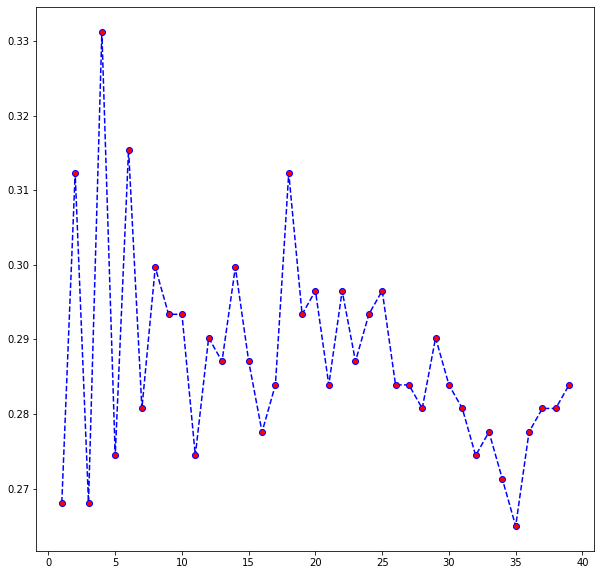

In [ ]:
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))
plt.figure(figsize=(10,10))
plt.plot(range(1,40), error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.21      0.32        98\n           1       0.73      0.94      0.82       219\n\n    accuracy                           0.72       317\n   macro avg       0.67      0.58      0.57       317\nweighted avg       0.69      0.72      0.67       317\n'

In [ ]:
confusion_matrix(y_test, pred)

array([[ 21,  77],
       [ 13, 206]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        98\n           1       1.00      1.00      1.00       219\n\n    accuracy                           1.00       317\n   macro avg       1.00      1.00      1.00       317\nweighted avg       1.00      1.00      1.00       317\n'

In [ ]:
confusion_matrix(y_test,pred)

array([[ 98,   0],
       [  0, 219]])

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
classification_report(y_test,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        98\n           1       0.69      1.00      0.82       219\n\n    accuracy                           0.69       317\n   macro avg       0.35      0.50      0.41       317\nweighted avg       0.48      0.69      0.56       317\n'

In [ ]:
confusion_matrix(y_test,pred)

array([[  0,  98],
       [  0, 219]])